In [1]:
import pandas as pd
df=pd.read_csv("datascan_ii.csv")
df.head()

,Unnamed: 0,dataSet,cardId,x,y,width,height,orgWidth,orgHeight,r0,...,b246,b247,b248,b249,b250,b251,b252,b253,b254,b255
0,0,datascan_ii,A0,167,54,281,184,640,480,22763,...,0,0,0,0,0,0,0,0,0,0
1,1,datascan_ii,A0,167,54,281,184,640,480,22802,...,0,0,0,0,0,0,0,0,0,0
2,2,datascan_ii,A0,167,54,281,184,640,480,22805,...,0,0,0,0,0,0,0,0,0,0
3,3,datascan_ii,A0,155,70,289,192,640,480,23588,...,0,0,0,0,0,0,0,0,0,0
4,4,datascan_ii,A0,130,135,309,198,640,480,19774,...,0,0,0,0,0,0,0,0,0,0


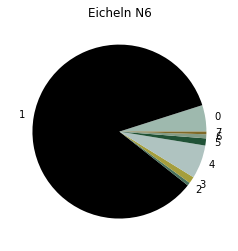

In [1]:
import JassSummarizer as js
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import shutil
import os
import cv2                                                              # computer vision python library see README.md dependencies

from sklearn.cluster import KMeans
row=0                                                                           # row counter initialization
kmeans = KMeans(n_clusters=8,random_state=0)                                    # setting clustersize to 8
                
path = r".\images\a"                                                            # defining input path
path = os.path.join(r".\images\02_data_preparation", "train_datascan_ii")
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']

targetCard=fileList[7]                                                          # choose source of Eichen König
cardId=targetCard.split("\\")[-1][0:2].upper()                                  # set CardId
img = cv2.imread(targetCard)                                                    # row counter initialization
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                                       # convert color mode to rgb
#frameOrg,mask,img_rect,res,crop_img,d = js.analyzeScan(frame,t_rescaled)
img=rgb.reshape((img.shape[1]*img.shape[0],3))                                  # reshape for 2d input shape
s=kmeans.fit(img, y=None);                                                      # fit it

labels=list(kmeans.labels_)                                                     # get labels
centroid=kmeans.cluster_centers_                                                # get cluster centers
percent=[]                                                                      # empty percent array
for i in range(len(centroid)):                                                  # iterate trough clusters
  j=labels.count(i)                                                             # get numbered labels
  j=j/(len(labels))                                                             # calc percent value
  percent.append(j)                                                             # add percent value
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))  # draw chart
plt.title(js.jassCardName(cardId))                                              # set chart title 
plt.show()
                


In [22]:
crop_img.shape

(181, 316, 3)

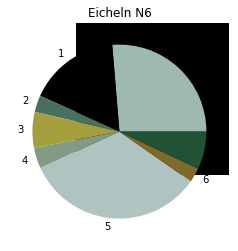

In [24]:
c2=rgb.copy()
frameOrg,mask,img_rect,res,crop_img,d = js.analyzeScan(c2,0.4)
plt.imshow(crop_img)
c3=crop_img.reshape((crop_img.shape[1]*crop_img.shape[0],3)) 
s=kmeans.fit(c3, y=None);    
labels=list(kmeans.labels_)                                                     # get labels
centroid=kmeans.cluster_centers_                                                # get cluster centers
percent=[]                                                                      # empty percent array
for i in range(len(centroid)):                                                  # iterate trough clusters
  j=labels.count(i)                                                             # get numbered labels
  j=j/(len(labels))                                                             # calc percent value
  percent.append(j)                                                             # add percent value
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))  # draw chart
plt.title(js.jassCardName(cardId))                                              # set chart title 
plt.show()

In [16]:
imageDimension=(rgb.shape[0],rgb.shape[1])
percent

[0.5518844082792858,
 0.133122147489791,
 0.11242518416206261,
 0.040076517335255024,
 0.06025177155897189,
 0.044245185763471855,
 0.027180168548322524,
 0.0308146168628393]

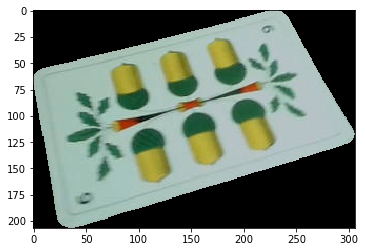

In [36]:
import os
path = os.path.join(r".\images\02_data_preparation", "train_datascan_ii")
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == ".jpg"]

for file in fileList[11:12]:
    myImage=cv2.imread(file,cv2.IMREAD_COLOR)
    frameOrg,mask,img_rect,res,original,d=js.analyzeScan(myImage,0.5)
rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)                 # color channel switch to RGB    
plt.imshow(rgb)

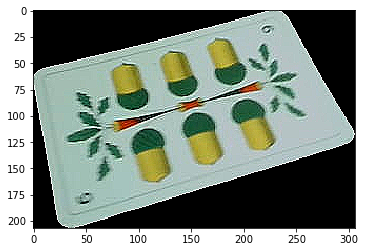

In [37]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
im = cv2.filter2D(rgb, -1, kernel)
plt.imshow(im)

In [20]:
imageDimension[0]

1104

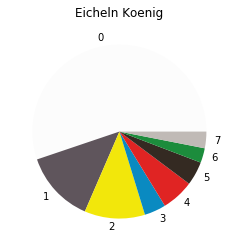

In [2]:
import JassSummarizer as js
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import shutil
import os
import cv2                                                              # computer vision python library see README.md dependencies

from sklearn.cluster import KMeans
row=0                                                                           # row counter initialization
kmeans = KMeans(n_clusters=8,random_state=0)                                    # setting clustersize to 8
                
path = r".\images\a"                                                            # defining input path
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']

targetCard=fileList[7]                                                          # choose source of Eichen König
cardId=targetCard.split("\\")[-1][0:2].upper()                                  # set CardId
img = cv2.imread(targetCard)                                                    # row counter initialization
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                                       # convert color mode to rgb
imgA=rgb.reshape((img.shape[1]*img.shape[0],3))                                  # reshape for 2d input shape
s=kmeans.fit(imgA, y=None);                                                      # fit it

labels=list(kmeans.labels_)                                                     # get labels
centroid=kmeans.cluster_centers_                                                # get cluster centers
percent=[]                                                                      # empty percent array
for i in range(len(centroid)):                                                  # iterate trough clusters
  j=labels.count(i)                                                             # get numbered labels
  j=j/(len(labels))                                                             # calc percent value
  percent.append(j)                                                             # add percent value
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))  # draw chart
plt.title(js.jassCardName(cardId))                                              # set chart title 
plt.show()
                


In [101]:
print(s,imgA.shape[0])
ss=kmeans.predict(imgA);   

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0) 799296


(160, 312, 3)


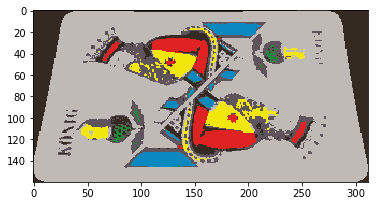

In [217]:

ss=kmeans.predict(c3)
sss=ss.reshape((crop_img.shape[0],crop_img.shape[1]))
ssss = np.empty((sss.shape[0],sss.shape[1],3)).astype("uint")
for q in np.arange(0,sss.shape[0]):
    for w in np.arange(0,sss.shape[1]):
        color=sss[q][w]
        ssss[q,w,0]=int(centroid[color][0])
        ssss[q,w,1]=int(centroid[color][1])
        ssss[q,w,2]=int(centroid[color][2])
plt.imshow(ssss)
print(ssss.shape)

In [155]:
np.empty((sss.shape[0],sss.shape[1],3)).shape

(1104, 724, 3)

In [216]:

sss=ss.reshape((img.shape[0],img.shape[1]))
ssss = np.empty((sss.shape[0],sss.shape[1],3)).astype("uint")
for q in np.arange(0,sss.shape[0]):
    for w in np.arange(0,sss.shape[1]):
        color=sss[q][w]
        ssss[q,w,0]=int(centroid[color][0])
        ssss[q,w,1]=int(centroid[color][1])
        ssss[q,w,2]=int(centroid[color][2])
plt.imshow(ssss)
print(ssss.shape)

ValueError: cannot reshape array of size 49920 into shape (1104,724)

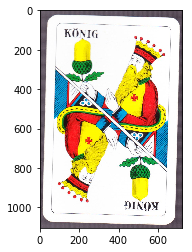

In [200]:
plt.imshow(rgb)

In [89]:
print(np.unique(ss,return_counts=True))
print(centroid)
centroid[0,0]*centroid[0,1]*centroid[0,2]

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([441119, 106404,  89861,  32033,  48159,  35365,  21725,  24630],
      dtype=int64))
[[252.34878759 252.31322594 252.02299434]
 [ 95.41158783  84.73093909  92.39878033]
 [242.45134654 231.12806588  10.6661696 ]
 [ 10.41446362 137.91919223 193.41721027]
 [223.89391391  35.54828796  34.63944434]
 [ 52.35619381  42.49918019  33.74071352]
 [ 27.9487333  139.66416398  59.96066329]
 [191.792192   186.4371022  181.7613816 ]]


16046540.109811258

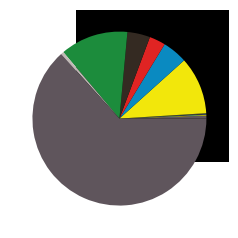

In [3]:
path = os.path.join(r".\images\02_data_preparation", "train_datascan_ii")
fl2 = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']
targetCard=fl2[212]                                                          # choose source of Eichen König
cardId=targetCard.split("\\")[-1][0:2].upper()                                  # set CardId
img2 = cv2.imread(targetCard)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)   
frameOrg,mask,img_rect,res,crop_img,d = js.analyzeScan(img2,0.4)
plt.imshow(crop_img)
c3=crop_img.reshape((crop_img.shape[1]*crop_img.shape[0],3)) 
s=kmeans.predict(c3);
q=np.unique(s,return_counts=True)                                       # q stores the colors found
total=np.sum(q[1])                                                      # count total

index=0                                                                 # loop counter for colors found
cent2=[]                                                                # centroid of clusters
for i in range(len(centroid)):                                          # loop trough centroids
  if index ==len(q[0]):                                                 # are all colors done
    break                                                               # if yes break      
  if q[0][index]!=i:                                                    # if color is not available in the analyzing card
    continue                                                            # then take next
  j=100/total*q[1][index]                                               # otherwise get percentage
  cent2.append(centroid[i]/255)                                         # get color
  index=index+1                                                         # next color
  percent.append(j)                                                     # add percent value
plt.pie(percent,colors=np.array(cent2))
plt.show()

In [4]:
s

array([5, 5, 5, ..., 5, 5, 5])

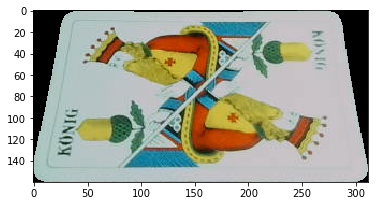

In [5]:
plt.imshow(crop_img)

In [6]:
frame=crop_img.copy()
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,100,100])
upper_blue = np.array([130,255,255])

#How to define this range for white color


# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

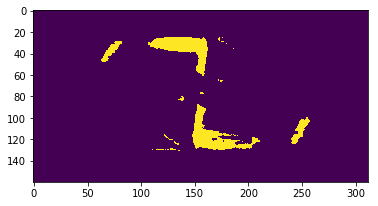

In [7]:
plt.imshow(mask)

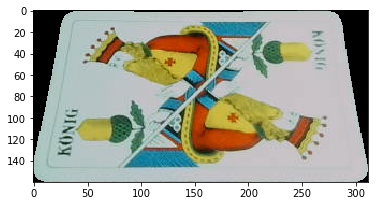

In [93]:
frame=crop_img.copy()
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

sensitivity = 115
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])

# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_white, upper_white)
# Bitwise-AND mask and original image
mask=cv2.bitwise_not(mask)
white = np.full(frame.shape[0:2],255, np.uint8)
wmask = cv2.bitwise_and(white,white, mask= mask)
res2 = cv2.bitwise_and(frame,frame, mask= wmask)
res = cv2.bitwise_and(frame,frame, mask= mask)
#res = cv2.bitwise_and(frame,frame, mask= mask)

plt.imshow(frame)




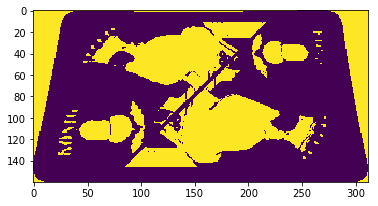

In [94]:
plt.imshow(mask)

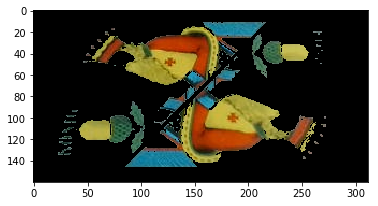

In [95]:
plt.imshow(res)

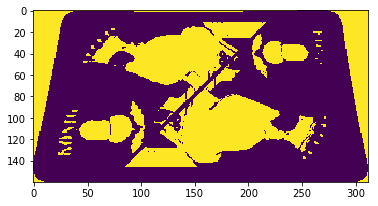

In [96]:
#wmask=cv2.cvtColor(wmask, cv2.COLOR_BGR2RGB)
wmask=wmask
plt.imshow(wmask)

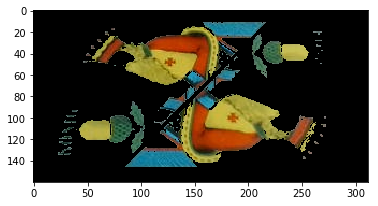

In [100]:
res2 = cv2.bitwise_and(res,np.full(frame.shape[0:3],255, np.uint8), mask= wmask)
plt.imshow(res2)

In [1]:
import pandas as pd
import datetime
print(f"Analyzing Model , by  with  images | Time {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Analyzing Model , by  with  images | Time 2021-03-23 13:31:38


In [2]:
pd.Timestamp.now

<bound method Timestamp.now of <class 'pandas._libs.tslibs.timestamps.Timestamp'>>

In [3]:
import os
import time
path=r"."
dr=pd.DataFrame()
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if (os.path.splitext(f)[1] == '.csv' and os.path.split(f)[1].startswith("ML") and not os.path.split(f)[1].endswith("iii.csv"))]
for file in fileList:
    temp=pd.read_csv(file,index_col=False)
    temp["source"]=file
    temp["date"]=int(os.path.getmtime(file))
    temp['date'] = pd.to_datetime(temp['date'],unit='s')
    dr=dr.append(temp,sort=False)
dr.reset_index(drop=True, inplace=True)
dd=dr[dr["set"]== "test"].sort_values(["acc","loss"],ascending=[False,True])[["model","acc","loss","set","source","date"]]
dd.reset_index(drop=True, inplace=True)


In [4]:
dd

,model,acc,loss,set,source,date
0,CNN64MA,0.998,0.008,test,.\ML_results_v_99.csv,2021-03-21 12:40:26
1,CNN224,0.998,0.009,test,.\ML_results_v.csv,2021-03-16 22:47:20
2,CNN224,0.998,0.009,test,.\ML_results_v_100.csv,2021-03-16 22:49:05
3,CNN64,0.998,0.010,test,.\ML_results_v_80.csv,2021-03-12 16:08:37
4,CNN64,0.998,0.010,test,.\ML_results_v_99.csv,2021-03-21 12:40:26
5,CNN224,0.998,0.011,test,.\ML_results_v_99.csv,2021-03-21 12:40:26
6,CNN64DG,0.997,0.013,test,.\ML_results_v_80.csv,2021-03-12 16:08:37
7,CNN224,0.997,0.014,test,.\ML_results_v_80.csv,2021-03-12 16:08:37
8,CNN64DG,0.997,0.014,test,.\ML_results_v_99.csv,2021-03-21 12:40:26
9,CNN224DG,0.997,0.014,test,.\ML_results_v_99.csv,2021-03-21 12:40:26


In [120]:
! jupyter nbconvert --to html the_story_BACKUP.ipynb


[NbConvertApp] Converting notebook the_story_BACKUP.ipynb to html
[NbConvertApp] Writing 7914197 bytes to the_story_BACKUP.html
